In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, KFold
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,LabelEncoder
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
dTA = pd.read_csv('Machine learning.csv')
dTA.head()

,Sample Length,Sample Diameter,Sample Volume,Dry Weight,Particle Volume,Pore Volume,Porosity,Particle Density,Volumetric Density,Permeability,Location,BI Vol.,Bioturbation Index
0,2.146,2.528,10.766,26.84,10.06,0.7015,6.5122,2.49,2.67,0.0160,Burrow,96,5
1,4.246,2.526,21.267,53.86,20.52,0.7446,3.4995,2.53,2.62,0.0156,Burrow,4,1
2,2.394,2.524,11.972,30.28,11.52,0.4557,3.8041,2.53,2.63,0.0350,Burrow,100,6
3,2.384,2.538,12.055,30.57,11.12,0.9343,7.7463,2.54,2.75,0.0246,Burrow,96,5
4,4.142,2.536,20.911,52.22,19.28,1.6342,7.8109,2.50,2.71,0.0241,Matrix,0,0


In [3]:
Encoder = LabelEncoder()
dTA['Location'] = Encoder.fit_transform(dTA['Location'])

In [4]:
print('Checking the Null: ',dTA.isnull().sum())
print('Checking the Nan: ',dTA.isna().sum())

Checking the Null:  Sample Length         0
Sample Diameter       0
Sample Volume         0
Dry Weight            0
Particle Volume       0
Pore Volume           0
Porosity              0
Particle Density      0
Volumetric Density    0
Permeability          0
Location              0
BI Vol.               0
Bioturbation Index    0
dtype: int64
Checking the Nan:  Sample Length         0
Sample Diameter       0
Sample Volume         0
Dry Weight            0
Particle Volume       0
Pore Volume           0
Porosity              0
Particle Density      0
Volumetric Density    0
Permeability          0
Location              0
BI Vol.               0
Bioturbation Index    0
dtype: int64


In [5]:
dTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sample Length       76 non-null     float64
 1   Sample Diameter     76 non-null     float64
 2   Sample Volume       76 non-null     float64
 3   Dry Weight          76 non-null     float64
 4   Particle Volume     76 non-null     float64
 5   Pore Volume         76 non-null     float64
 6   Porosity            76 non-null     float64
 7   Particle Density    76 non-null     float64
 8   Volumetric Density  76 non-null     float64
 9   Permeability        76 non-null     float64
 10  Location            76 non-null     int32  
 11  BI Vol.             76 non-null     int64  
 12  Bioturbation Index  76 non-null     int64  
dtypes: float64(10), int32(1), int64(2)
memory usage: 7.6 KB


In [6]:
dTA.describe()

,Sample Length,Sample Diameter,Sample Volume,Dry Weight,Particle Volume,Pore Volume,Porosity,Particle Density,Volumetric Density,Permeability,Location,BI Vol.,Bioturbation Index
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.670474,2.456237,12.706955,30.601053,11.270075,1.439730,11.905903,2.545579,2.601763,0.543403,0.421053,52.328947,2.934211
std,1.009254,0.067536,5.083903,12.662752,4.818277,0.940347,6.871460,0.253269,0.191158,1.388744,0.804374,41.781779,2.093390
min,0.946000,2.345000,4.472100,11.190000,3.927600,0.120100,1.784700,2.310000,2.002300,0.007100,0.000000,0.000000,0.000000
25%,1.954500,2.382000,9.704250,23.385000,8.790750,0.962350,7.584800,2.380000,2.511050,0.035600,0.000000,4.000000,1.000000
50%,2.415500,2.461500,11.666000,28.005000,10.270000,1.316400,11.015000,2.475000,2.685000,0.152500,0.000000,60.000000,3.000000
75%,3.394250,2.526000,14.977500,34.065000,12.557500,1.627300,12.477500,2.542500,2.710000,0.316750,0.000000,94.500000,5.000000
max,4.996000,2.552000,25.399000,63.170000,23.640000,5.375300,28.398000,3.307400,3.080000,7.009700,2.000000,100.000000,6.000000


In [7]:
scaler = MinMaxScaler()
X = dTA.drop('Permeability', axis=1)
cols = list(X.columns)
X = scaler.fit_transform(X)
new_dTA = pd.DataFrame(X, columns=cols)
new_dTA['Permeability'] = dTA['Permeability']
new_dTA.head()

,Sample Length,Sample Diameter,Sample Volume,Dry Weight,Particle Volume,Pore Volume,Porosity,Particle Density,Volumetric Density,Location,BI Vol.,Bioturbation Index,Permeability
0,0.296296,0.884058,0.300756,0.301077,0.311094,0.110633,0.177637,0.180469,0.619560,0.5,0.96,0.833333,0.0160
1,0.814815,0.874396,0.802551,0.820893,0.841724,0.118835,0.064434,0.220573,0.573165,0.5,0.04,0.166667,0.0156
2,0.357531,0.864734,0.358386,0.367257,0.385159,0.063861,0.075879,0.220573,0.582444,0.0,1.00,1.000000,0.0350
3,0.355062,0.932367,0.362352,0.372836,0.364867,0.154932,0.224008,0.230600,0.693792,0.0,0.96,0.833333,0.0246
4,0.789136,0.922705,0.785539,0.789342,0.778819,0.288115,0.226436,0.190495,0.656676,1.0,0.00,0.000000,0.0241


<Axes: >

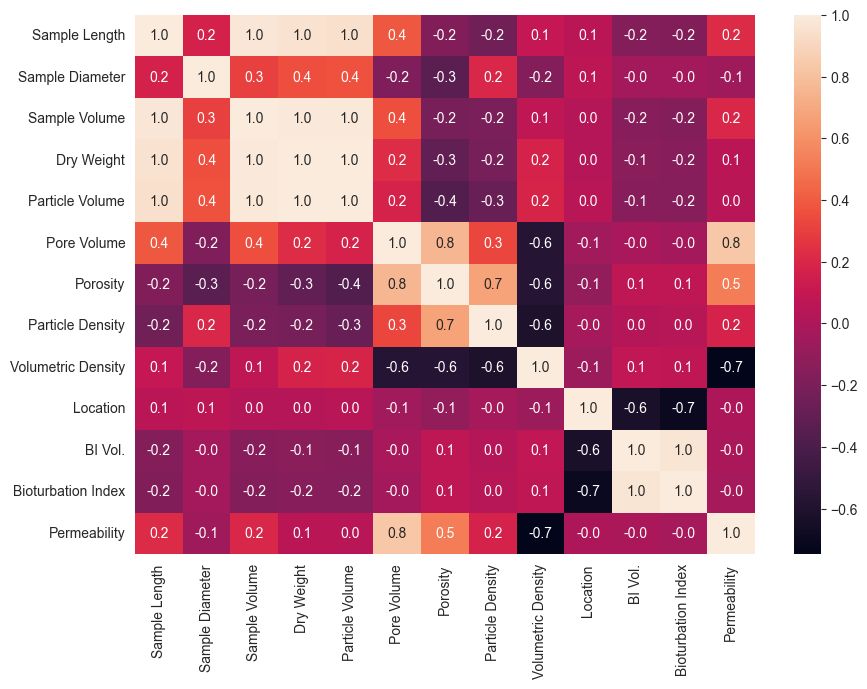

In [8]:
data_correlation = new_dTA.corr()
plt.figure(figsize=(10,7))
sns.heatmap(data_correlation, annot=True, fmt='0.1f')

In [9]:
X = new_dTA.drop('Permeability',axis=1)
y = new_dTA['Permeability']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60, 12) (16, 12)
(60,) (16,)


In [10]:
from sklearn.feature_selection import SelectKBest,  mutual_info_regression, f_regression

# 1. Using f_regression as a score_fun 
# 2. Using mutual_info_regression as score_fun

In [11]:
F_REG = SelectKBest(score_func = f_regression, k='all')
F_REG.fit_transform(X_train, y_train)
ReG_SCORE = pd.DataFrame()
ReG_SCORE['FEATURES'] = X_train.columns
ReG_SCORE['F_regression SCORES'] = F_REG.scores_

mUT_REG = SelectKBest(score_func=mutual_info_regression, k='all')
mUT_REG.fit_transform(X_train,y_train)
mUT_SCORE = pd.DataFrame()
mUT_SCORE['features'] = X_train.columns
mUT_SCORE['Mutual_info_regression SCORES'] = mUT_REG.scores_

In [12]:
SCORES = pd.concat([ReG_SCORE, mUT_SCORE], axis=1)
SCORES.to_csv('Perm_Features.csv')
SCORES

,FEATURES,F_regression SCORES,features,Mutual_info_regression SCORES
0,Sample Length,3.253555,Sample Length,0.012706
1,Sample Diameter,0.137584,Sample Diameter,0.454961
2,Sample Volume,2.708271,Sample Volume,0.000000
3,Dry Weight,0.280686,Dry Weight,0.003057
4,Particle Volume,0.182543,Particle Volume,0.165828
5,Pore Volume,129.969911,Pore Volume,0.156309
6,Porosity,23.955599,Porosity,0.280801
7,Particle Density,2.579316,Particle Density,0.689199
8,Volumetric Density,69.409385,Volumetric Density,0.258528
9,Location,0.040869,Location,0.000000


In [13]:
fs = SelectKBest()
svr = SVR()
pipe = Pipeline(steps=[('fs', fs), ('svr', svr)])
cv = KFold(n_splits=5)
param = {'svr__kernel': ['rbf', 'poly', 'linear'],
         'svr__C': [1, 10],
         'fs__k': [x for x in range(1, X_train.shape[1] + 1)],
         'fs__score_func':[mutual_info_regression,f_regression]
         }
search = GridSearchCV(pipe, param_grid=param, cv=cv, scoring='neg_mean_absolute_error')
search.fit(X_train, y_train)
SVR_Grid = pd.DataFrame(search.cv_results_)
SVR_Grid = SVR_Grid[['mean_test_score', 'param_fs__k','param_fs__score_func','param_svr__C','param_svr__kernel']]
SVR_Grid = SVR_Grid.sort_values(by='mean_test_score', ascending=False)
SVR_Grid.to_csv('PSVR.csv')
print(search.best_params_)
SVR_Grid.head()

{'fs__k': 5, 'fs__score_func': <function mutual_info_regression at 0x000001E067DC34C0>, 'svr__C': 10, 'svr__kernel': 'poly'}


,mean_test_score,param_fs__k,param_fs__score_func,param_svr__C,param_svr__kernel
52,-0.167826,5,<function mutual_info_regression at 0x000001E0...,10,poly
87,-0.175120,8,<function mutual_info_regression at 0x000001E0...,10,rbf
75,-0.175729,7,<function mutual_info_regression at 0x000001E0...,10,rbf
51,-0.176592,5,<function mutual_info_regression at 0x000001E0...,10,rbf
63,-0.176987,6,<function mutual_info_regression at 0x000001E0...,10,rbf


In [14]:
fs = SelectKBest()
knr = KNeighborsRegressor()
pipe = Pipeline(steps = [('fs',fs),('knr',knr)])
param = {'knr__n_neighbors': [3,5,7],
         'fs__k':[x for x in range(1, X_train.shape[1]+1)],
         'knr__p': [1,2],
         'knr__weights':['uniform','distance'],
         #'knr__algorithm':['auto','ball_tree','kd_tree']
          'fs__score_func':[mutual_info_regression,f_regression]
          }
cv = KFold(n_splits=5)
kNN_GRID = GridSearchCV(pipe, param_grid=param, cv=cv, scoring='neg_mean_absolute_error')
kNN_GRID.fit(X_train,y_train)
df = pd.DataFrame(kNN_GRID.cv_results_)
df = df[['mean_test_score','param_fs__k','param_knr__n_neighbors','param_knr__p','param_knr__weights','param_fs__score_func']]
df = df.sort_values(by='mean_test_score', ascending=False)
df.to_csv('PKNR.csv')
print(kNN_GRID.best_params_)
df.head()

{'fs__k': 6, 'fs__score_func': <function f_regression at 0x000001E067DE9620>, 'knr__n_neighbors': 3, 'knr__p': 1, 'knr__weights': 'distance'}


,mean_test_score,param_fs__k,param_knr__n_neighbors,param_knr__p,param_knr__weights,param_fs__score_func
133,-0.108302,6,3,1,distance,<function f_regression at 0x000001E067DE9620>
145,-0.112341,7,3,1,distance,<function mutual_info_regression at 0x000001E0...
135,-0.112972,6,3,2,distance,<function f_regression at 0x000001E067DE9620>
147,-0.115025,7,3,2,distance,<function mutual_info_regression at 0x000001E0...
123,-0.115164,6,3,2,distance,<function mutual_info_regression at 0x000001E0...


In [15]:
fs = SelectKBest()
rfr = RandomForestRegressor(random_state=0)
pipe = Pipeline(steps = [('fs',fs),('rfr',rfr)])
param = {'rfr__criterion': ['squared_error', 'friedman_mse', 'absolute_error','poisson'],
         'fs__k':[x for x in range(1, X_train.shape[1]+1)],
          'fs__score_func':[f_regression, mutual_info_regression],
         'rfr__n_estimators': [50,100]
          }
cv = KFold(n_splits=5)
dT_GRID = GridSearchCV(pipe, param_grid=param, cv=cv, scoring='neg_mean_absolute_error')
dT_GRID.fit(X_train,y_train)
dt = pd.DataFrame(dT_GRID.cv_results_)
dt = dt[['mean_test_score','param_fs__k','param_rfr__criterion','param_rfr__n_estimators','param_fs__score_func']]
dt = dt.sort_values(by='mean_test_score', ascending=False)
dt.to_csv('PRTR.csv')
print(dT_GRID.best_params_)
dt.head()

{'fs__k': 7, 'fs__score_func': <function f_regression at 0x000001E067DE9620>, 'rfr__criterion': 'squared_error', 'rfr__n_estimators': 50}


,mean_test_score,param_fs__k,param_rfr__criterion,param_rfr__n_estimators,param_fs__score_func
96,-0.154809,7,squared_error,50,<function f_regression at 0x000001E067DE9620>
98,-0.159495,7,friedman_mse,50,<function f_regression at 0x000001E067DE9620>
102,-0.161314,7,poisson,50,<function f_regression at 0x000001E067DE9620>
97,-0.163548,7,squared_error,100,<function f_regression at 0x000001E067DE9620>
128,-0.165028,9,squared_error,50,<function f_regression at 0x000001E067DE9620>


In [16]:
fs = SelectKBest()
dtr = DecisionTreeRegressor(random_state=0)
pipe = Pipeline(steps=[('fs',fs),('dtr',dtr)])
param = {'fs__score_func':[f_regression,mutual_info_regression],
         'dtr__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         'dtr__splitter': ['random', 'best'],
         'fs__k': [x for x in range(1, X_train.shape[1]+1)]
        }
cv = KFold(n_splits=5)
dtr_search = GridSearchCV(pipe, param_grid=param, cv=cv, scoring='neg_mean_absolute_error')
dtr_search.fit(X_train,y_train)
dtr_df = pd.DataFrame(dtr_search.cv_results_)
dtr_df.head()
dtr_df = dtr_df[['mean_test_score','param_dtr__criterion','param_dtr__splitter','param_fs__k','param_fs__score_func']]
dtr_df  = dtr_df.sort_values(by='mean_test_score', ascending=False)
dtr_df.to_csv('PDTR.csv')
dtr_df.head()

,mean_test_score,param_dtr__criterion,param_dtr__splitter,param_fs__k,param_fs__score_func
179,-0.095870,poisson,best,6,<function mutual_info_regression at 0x000001E0...
130,-0.102283,absolute_error,best,6,<function f_regression at 0x000001E067DE9620>
161,-0.106323,poisson,random,9,<function mutual_info_regression at 0x000001E0...
132,-0.108288,absolute_error,best,7,<function f_regression at 0x000001E067DE9620>
128,-0.109173,absolute_error,best,5,<function f_regression at 0x000001E067DE9620>


In [17]:
fs = SelectKBest()
lnr = LinearRegression()
pipe = Pipeline(steps=[('fs',fs),('lnr',lnr)])
param = {'fs__score_func':[f_regression,mutual_info_regression],
         'fs__k': [x for x in range(1, X_train.shape[1]+1)]
        }
cv = KFold(n_splits=5)
lnr_search = GridSearchCV(pipe, param_grid=param, cv=cv, scoring='neg_mean_absolute_error')
lnr_search.fit(X_train,y_train)
lnr_df = pd.DataFrame(lnr_search.cv_results_)
lnr_df = lnr_df[['mean_test_score','param_fs__k','param_fs__score_func']]
lnr_df  = lnr_df.sort_values(by='mean_test_score', ascending=False)
lnr_df.to_csv('Plnr.csv')
lnr_df.head()

,mean_test_score,param_fs__k,param_fs__score_func
12,-0.268940,7,<function f_regression at 0x000001E067DE9620>
11,-0.269535,6,<function mutual_info_regression at 0x000001E0...
19,-0.269704,10,<function mutual_info_regression at 0x000001E0...
15,-0.272461,8,<function mutual_info_regression at 0x000001E0...
10,-0.272689,6,<function f_regression at 0x000001E067DE9620>


# Training Best Params

In [19]:
# SVR (5 features only, using mutual_info_regression score_func)
S_train = X_train[['Particle Density','Sample Diameter','Volumetric Density','Porosity','Particle Volume']]
S_test  = X_test[['Particle Density','Sample Diameter','Volumetric Density','Porosity','Particle Volume']]
Svr = SVR(kernel='poly', C=10)
Svr.fit(S_train, y_train)
Sv_pred = Svr.predict(S_test)
Sv_mae = mean_absolute_error(y_test, Sv_pred)
Sv_mse = mean_squared_error(y_test, Sv_pred)
print('Sv mae',Sv_mae)
print('Sv mse',Sv_mse)

Sv mae 0.13191098395983264
Sv mse 0.04605335018484074


In [20]:
# KNR ( 6 features only, using f_regression score_func)
K_train = X_train[['Pore Volume','Porosity','Volumetric Density','Particle Density','Sample Length','Sample Volume']]
K_test  = X_test[['Pore Volume','Porosity','Volumetric Density','Particle Density','Sample Length','Sample Volume']]
Knr = KNeighborsRegressor(n_neighbors=3,p=1,weights='distance')
Knr.fit(K_train, y_train)
Kn_pred = Knr.predict(K_test)
Kn_mae = mean_absolute_error(y_test, Kn_pred)
kN_mse = mean_squared_error(y_test, Kn_pred)
print('Kn mae',Kn_mae)
print('Kn mse',kN_mse)

Kn mae 0.0470661193762069
Kn mse 0.006794417900959476


In [21]:
# Decision tree regressor ( 6 features only, using mutual_info_regression score_func)
D_train = X_train[['Particle Density','Sample Diameter','Volumetric Density','Porosity','Particle Volume','Pore Volume']]
D_test  = X_test[['Particle Density','Sample Diameter','Volumetric Density','Porosity','Particle Volume','Pore Volume']]
Dtr  = DecisionTreeRegressor(criterion='poisson',splitter='best' ,random_state=0)
Dtr.fit(D_train, y_train)
Dtr_pred = Dtr.predict(D_test)
Dtr_mae = mean_absolute_error(y_test, Dtr_pred)
Dtr_mse = mean_squared_error(y_test, Dtr_pred)
print('Dtr mae',Dtr_mae)
print('Dtr mse',Dtr_mse)

Dtr mae 0.05352499999999999
Dtr mse 0.009322185000000002


In [22]:
# Random Forest regressor ( 7 features only, using f_regression score_func)
R_train = X_train[['Pore Volume','Porosity','Volumetric Density','Particle Density','Sample Length','Sample Volume','Bioturbation Index']]
R_test = X_test[['Pore Volume','Porosity','Volumetric Density','Particle Density','Sample Length','Sample Volume','Bioturbation Index']]
Rfr = RandomForestRegressor(criterion='squared_error', n_estimators=50, random_state=0)
Rfr.fit(R_train, y_train)
Rfr_pred = Rfr.predict(R_test)
Rfr_mae = mean_absolute_error(y_test, Rfr_pred)
Rfr_mse = mean_squared_error(y_test, Rfr_pred)
print('Rfr mae',Rfr_mae)
print('Rfr mse',Rfr_mse)


Rfr mae 0.09444212499999989
Rfr mse 0.018912790646749993


In [23]:
# Linear Regression ( 7 features only, using f_regression score_func)
L_train = X_train[['Pore Volume','Porosity','Volumetric Density','Particle Density','Sample Length','Sample Volume','Bioturbation Index']]
L_test = X_test[['Pore Volume','Porosity','Volumetric Density','Particle Density','Sample Length','Sample Volume','Bioturbation Index']]
lnr = LinearRegression()
lnr.fit(L_train, y_train)
lnr_pred = lnr.predict(L_test)
lnr_mae = mean_absolute_error(y_test, lnr_pred)
lnr_mse = mean_squared_error(y_test, lnr_pred)
print('lnr mae',lnr_mae)
print('lnr mse',lnr_mse)

lnr mae 0.25852543756809476
lnr mse 0.11135418032100688


In [25]:
Perm_Errors = {'SVR':[Sv_mae,Sv_mse],'KNR':[Kn_mae,kN_mse],'DTR':[Dtr_mae,Dtr_mse],'RFR':[Rfr_mae,Rfr_mse],'LNR':[lnr_mae,lnr_mse]}
Perm_Errors = pd.DataFrame(Perm_Errors, index=['mean_absolute_error','mean_squared_error'])
Perm_Errors.to_csv('Perm _Errors.csv')
Perm_Errors

,SVR,KNR,DTR,RFR,LNR
mean_absolute_error,0.131911,0.047066,0.053525,0.094442,0.258525
mean_squared_error,0.046053,0.006794,0.009322,0.018913,0.111354


In [27]:
Prediction = {'True Perm': y_test,'SVR Perm': Sv_pred,'KNR Perm':Kn_pred,'DTR Perm':Dtr_pred,'RFR Perm':Rfr_pred,'LNR Perm': lnr_pred}
Prediction = pd.DataFrame(Prediction)
Prediction.to_csv('Perm.csv')